In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import bokeh

In [6]:
from sklearn import metrics
from sklearn.metrics import roc_curve

In [4]:
df_list = list()
df_list.append(pd.read_csv('df11_new.csv'))
df_list.append(pd.read_csv('df12_new.csv'))
df_list.append(pd.read_csv('df21_new.csv'))
df_list.append(pd.read_csv('df22_new.csv'))

In [7]:
%matplotlib inline
from matplotlib import rc
rc('font', family = 'NanumGothic')

In [8]:
dn = df_list[0]
dn.head()

gender  age     job  marital province  city prefer  frequency  \
0    MALE  50대  중소기업직원  MARREID      부산시  해운대구     당도          5   
1  FEMALE  30대     연구원   SINGLE      경상도   하동군    깊이감          2   
2  FEMALE  30대     자영업  MARREID      부산시   사하구    깊이감          4   
3  FEMALE  40대     자영업  MARREID      부산시   사하구     당도          1   
4  FEMALE  40대      의사  MARREID      서울시   강남구    깊이감          1   

   wineFrequency        side  ... choice1_과일향  choice1_오크향 choice1_깊이  \
0              4       Annon  ...           M            H          H   
1              1   Roquefort  ...           H            M          L   
2              1     Cheddar  ...           H            M          L   
3              1  Gorgonzola  ...           H            M          L   
4              1  Gorgonzola  ...           H            M          M   

  choice1_견고함 choice2_당도 choice2_알콜 농도 choice2_과일향 choice2_오크향 choice2_깊이  \
0           H          M             H           M           H          H   
1           L          H             L           H           M          L   
2           M          L             H           H           H          M   
3           L          H             L           H           M          L   
4           M          H             L           H           M          M   

  choice2_견고함  
0           H  
1           M  
2           M  
3           M  
4           M  

[5 rows x 26 columns]

dn = df_list[1]
dn.head()
category = [category for category in dn.columns if dn[category].dtype == 'O']

fig, ax = plt.subplots(nrows=int((len(category)+1)/2), ncols=2, figsize = (30, 30))
for idx, cat in enumerate(category):
    tmp_x = sorted(dn[cat].unique())
    tmp_y = [len(dn[dn[cat] == cls]) for cls in tmp_x]
    ax[int(idx/2), idx%2].bar(x = tmp_x, height = tmp_y)
    ax[int(idx/2), idx%2].title.set_text(cat)
plt.savefig('df12.png')

dn = df_list[2]

category = [category for category in dn.columns if dn[category].dtype == 'O']

fig, ax = plt.subplots(nrows=int((len(category)+1)/2), ncols=2, figsize = (30, 30))
for idx, cat in enumerate(category):
    tmp_x = sorted(dn[cat].unique())
    tmp_y = [len(dn[dn[cat] == cls]) for cls in tmp_x]
    ax[int(idx/2), idx%2].bar(x = tmp_x, height = tmp_y)
    ax[int(idx/2), idx%2].title.set_text(cat)
plt.savefig('df21.png')

dn = df_list[3]
dn.head()
category = [category for category in dn.columns if dn[category].dtype == 'O']

fig, ax = plt.subplots(nrows=int((len(category)+1)/2), ncols=2, figsize = (30, 30))
for idx, cat in enumerate(category):
    tmp_x = sorted(dn[cat].unique())
    tmp_y = [len(dn[dn[cat] == cls]) for cls in tmp_x]
    ax[int(idx/2), idx%2].bar(x = tmp_x, height = tmp_y)
    ax[int(idx/2), idx%2].title.set_text(cat)
plt.savefig('df22.png')

In [8]:
dn = dn.copy()

# for cat in category:
#     tmp_dict = dict()
#     for idx, val in enumerate(dn[cat].unique()):
#         tmp_dict[val] = idx
#     dn[cat+'_n'] = dn[cat].apply((lambda x:tmp_dict[x]))

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [10]:
qq = dn.drop(['choice1_당도', 'choice1_알콜 농도', 'choice1_과일향', 'choice1_오크향',
       'choice1_깊이', 'choice1_견고함', 'choice2_당도', 'choice2_알콜 농도',
       'choice2_과일향', 'choice2_오크향', 'choice2_깊이', 'choice2_견고함'], axis = 1, inplace = False)

In [11]:
qq_y = qq['choice1']
qq_x = qq.drop('choice1', axis=1, inplace = False)

qq_train_x, qq_test_x, qq_train_y, qq_test_y = train_test_split(qq_x, qq_y, test_size = 0.3)

In [12]:
pd.set_option('display.max_columns', None)  

In [13]:
pd.set_option('display.max_rows', None)

In [14]:
qdict = dict()

for f1_idx, f1 in enumerate(qq.columns):
    for f2 in ['choice1']:
        qtmp = pd.DataFrame()
        for u_idx1, u1 in enumerate(qq[f1].unique()):
            for u_idx2, u2 in enumerate(qq[f2].unique()):
                one_d_index = u_idx1 * len(qq[f2].unique()) + u_idx2
                qtmp.loc[one_d_index, f1] = u1
                qtmp.loc[one_d_index, f2] = u2
                qtmp.loc[one_d_index, 'score'] = len(qq[(qq[f1] == u1) & (qq[f2] == u2)])
        qdict[f1+'_'+f2] = qtmp

# for unique1 in qq['gender'].unique():
#     for 
# df_heatmap = qtmp.pivot_table(values=)

KeyboardInterrupt: 

In [ ]:
change_this = 'gender'
df_heatmap = qdict[change_this + '_choice1'].pivot_table(values='score',index=change_this,columns='choice1',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=False, cmap = sns.color_palette("Blues"))
plt.show()

In [ ]:
change_this = 'age'
df_heatmap = qdict[change_this + '_choice1'].pivot_table(values='score',index=change_this,columns='choice1',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=False, cmap = sns.color_palette("Blues"))
plt.show()

In [ ]:
change_this = 'job'
df_heatmap = qdict[change_this + '_choice1'].pivot_table(values='score',index=change_this,columns='choice1',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=False, cmap = sns.color_palette("Blues"))
plt.show()

In [ ]:
change_this = 'marital'
df_heatmap = qdict[change_this + '_choice1'].pivot_table(values='score',index=change_this,columns='choice1',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=False, cmap = sns.color_palette("Blues"))
plt.show()

In [ ]:
change_this = 'province'
df_heatmap = qdict[change_this + '_choice1'].pivot_table(values='score',index=change_this,columns='choice1',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=False, cmap = sns.color_palette("Blues"))
plt.show()

In [ ]:
change_this = 'city'
df_heatmap = qdict[change_this + '_choice1'].pivot_table(values='score',index=change_this,columns='choice1',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=False, cmap = sns.color_palette("Blues"))
plt.show()

In [ ]:
change_this = 'prefer'
df_heatmap = qdict[change_this + '_choice1'].pivot_table(values='score',index=change_this,columns='choice1',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=False, cmap = sns.color_palette("Blues"))
plt.show()

In [ ]:
change_this = 'frequency'
df_heatmap = qdict[change_this + '_choice1'].pivot_table(values='score',index=change_this,columns='choice1',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=False, cmap = sns.color_palette("Blues"))
plt.show()

In [ ]:
change_this = 'wineFrequency'
df_heatmap = qdict[change_this + '_choice1'].pivot_table(values='score',index=change_this,columns='choice1',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=False, cmap = sns.color_palette("Blues"))
plt.show()

In [28]:
# q_temp = pd.DataFrame()
# for idx1, c1 in enumerate(sorted(qq['choice1'].unique())):
#     for idx2, c2 in enumerate(sorted(qq['choice2'].unique())):
#         q_temp.loc[idx1*len(qq['choice2'].unique()) + idx2, 'choice1'] = c1
#         q_temp.loc[idx1*len(qq['choice2'].unique()) + idx2, 'choice2'] = c2
#         q_temp.loc[idx1*len(qq['choice2'].unique()) + idx2, 'score'] = len(qq[(qq['choice1']==c1) & qq['choice2']==c2])
# df_heatmap = q_temp.pivot_table(values='score', index = )

In [ ]:
change_this = 'side'
df_heatmap = qdict[change_this + '_choice1'].pivot_table(values='score',index=change_this,columns='choice1',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=False, cmap = sns.color_palette("Blues"))
plt.show()

In [ ]:
change_this = 'area_grade'
df_heatmap = qdict[change_this + '_choice1'].pivot_table(values='score',index=change_this,columns='choice1',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=False, cmap = sns.color_palette("Blues"))
plt.show()

In [ ]:
change_this = 'choice2'
df_heatmap = qdict[change_this + '_choice1'].pivot_table(values='score',index=change_this,columns='choice1',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=False, cmap = sns.color_palette("Blues"))
plt.show()

In [15]:
qd = pd.get_dummies(qq)

In [16]:
qq_train_x = pd.get_dummies(qq_train_x)
qq_test_x = pd.get_dummies(qq_test_x)

In [17]:
tree_uncustomized = DecisionTreeClassifier(random_state = 777)
tree_uncustomized.fit(qq_train_x, qq_train_y)
print(tree_uncustomized.score(qq_test_x, qq_test_y))

0.2906666666666667


In [24]:
classification_report(f1_score(qq_test_y, tree_uncustomized.predict(qq_test_x), average = 'weighted'))

TypeError: classification_report() missing 1 required positional argument: 'y_pred'

In [18]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [25]:
# probs = tree_uncustomized.predict_proba(qq_test_x)
# preds = probs[:,1]
# fpr, tpr, threshold = roc_curve(qq_test_y, preds)
# roc_auc = metrics.auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [26]:
train_acc = list()
test_acc = list()

para_depth = [depth for depth in range(1, 15)]

for depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = depth, random_state = 777)
    tree.fit(qq_train_x, qq_train_y)
    train_acc.append(tree.score(qq_train_x, qq_train_y))
    test_acc.append(tree.score(qq_test_x, qq_test_y))
    
result = pd.DataFrame()
result['depth'] = para_depth
result['train'] = train_acc
result['test'] = test_acc
result.round(3)

depth  train   test
0       1  0.259  0.252
1       2  0.276  0.268
2       3  0.345  0.340
3       4  0.371  0.355
4       5  0.391  0.373
5       6  0.414  0.378
6       7  0.440  0.389
7       8  0.471  0.399
8       9  0.507  0.403
9      10  0.550  0.411
10     11  0.588  0.401
11     12  0.630  0.396
12     13  0.669  0.397
13     14  0.707  0.383

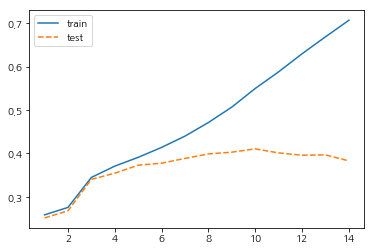

In [27]:
plt.plot(para_depth, train_acc, linestyle = '-', label = 'train')
plt.plot(para_depth, test_acc, linestyle = '--', label = 'test')
plt.legend()

In [28]:
# depth == 4

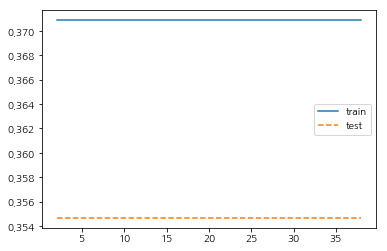

In [29]:
train_acc = list()
test_acc = list()

para_split = [split * 2 for split in range(1, 20)]

for split in para_split:
    tree = DecisionTreeClassifier(max_depth=4, min_samples_split = split, random_state = 777)
    tree.fit(qq_train_x, qq_train_y)
    train_acc.append(tree.score(qq_train_x, qq_train_y))
    test_acc.append(tree.score(qq_test_x, qq_test_y))
    
result = pd.DataFrame()
result['split'] = para_split
result['train'] = train_acc
result['test'] = test_acc

plt.plot(para_split, train_acc, linestyle = '-', label = 'train')
plt.plot(para_split, test_acc, linestyle = '--', label = 'test')
plt.legend()

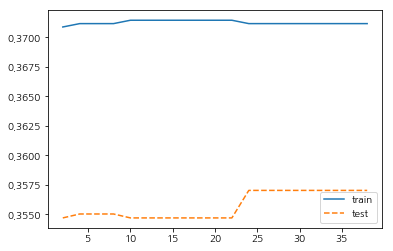

In [30]:
train_acc = list()
test_acc = list()

para_leaf = [leaf * 2 for leaf in range(1, 20)]

for leaf in para_leaf:
    tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf = leaf, random_state = 777)
    tree.fit(qq_train_x, qq_train_y)
    train_acc.append(tree.score(qq_train_x, qq_train_y))
    test_acc.append(tree.score(qq_test_x, qq_test_y))
    
result = pd.DataFrame()
result['leaf'] = para_leaf
result['train'] = train_acc
result['test'] = test_acc

plt.plot(para_leaf, train_acc, linestyle = '-', label = 'train')
plt.plot(para_leaf, test_acc, linestyle = '--', label = 'test')
plt.legend()

In [31]:
result.round(3)

leaf  train   test
0      2  0.371  0.355
1      4  0.371  0.355
2      6  0.371  0.355
3      8  0.371  0.355
4     10  0.371  0.355
5     12  0.371  0.355
6     14  0.371  0.355
7     16  0.371  0.355
8     18  0.371  0.355
9     20  0.371  0.355
10    22  0.371  0.355
11    24  0.371  0.357
12    26  0.371  0.357
13    28  0.371  0.357
14    30  0.371  0.357
15    32  0.371  0.357
16    34  0.371  0.357
17    36  0.371  0.357
18    38  0.371  0.357

In [32]:
# leaf == 12

In [47]:
tree_fin = DecisionTreeClassifier(min_samples_leaf=12, max_depth=4, random_state = 777)
tree_fin.fit(qq_train_x, qq_train_y)
submit = pd.DataFrame(index = range(10))
submit.loc[0, 'TrainAccuracy'] = tree_fin.score(qq_train_x, qq_train_y)
submit.loc[0, 'TestAccuracy'] = tree_fin.score(qq_test_x, qq_test_y)
submit.loc[0, 'F1Score'] = f1_score(qq_test_y, tree_fin.predict(qq_test_x), average = 'weighted')

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


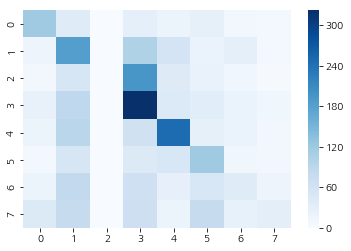

In [46]:
sns.heatmap(confusion_matrix(qq_test_y, tree_fin.predict(qq_test_x)), cmap = 'Blues')

In [48]:
print(f1_score(qq_test_y, tree_fin.predict(qq_test_x), average = 'weighted'))

0.31682635130535747


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
qq_train_y.unique()

array(['A', 'B', 'E', 'H', 'D', 'G', 'C', 'F'], dtype=object)

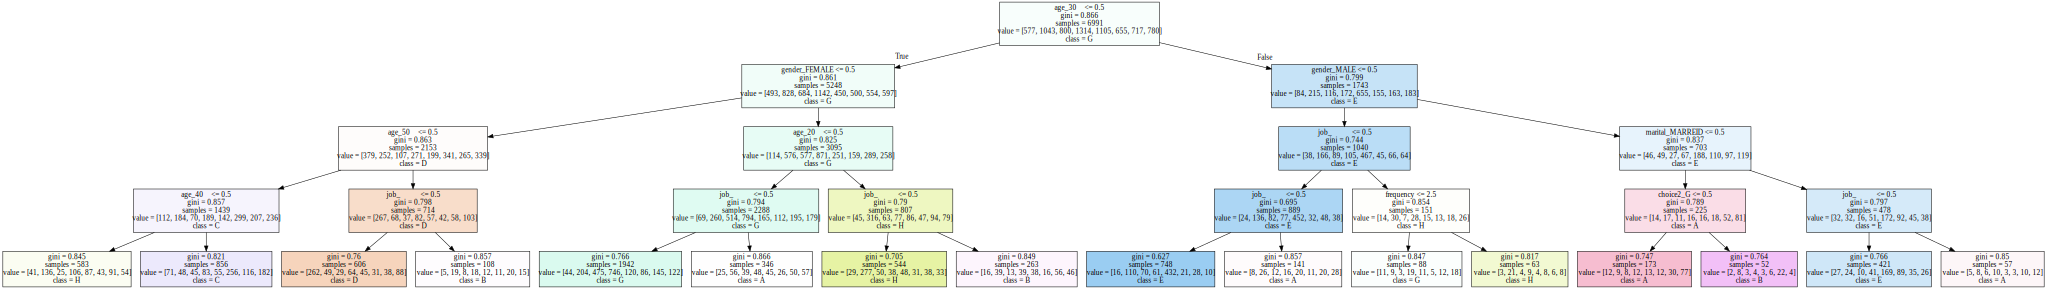

In [50]:
export_graphviz(tree_fin, out_file='tree_fin.dot', class_names = qq_train_y.unique(), feature_names=qq_train_x.columns, impurity = True, filled = True)

with open('tree_fin.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [51]:
wine_class = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H')

qq_wine = dict()
for wine_cl in wine_class:
    qq_wine[wine_cl] = qq[qq['choice1'] == wine_cl]

In [52]:
dn.head()

gender  age     job  marital province  city prefer  frequency  \
0    MALE  50대  중소기업직원  MARREID      부산시  해운대구     당도          5   
1  FEMALE  30대     연구원   SINGLE      경상도   하동군    깊이감          2   
2  FEMALE  30대     자영업  MARREID      부산시   사하구    깊이감          4   
3  FEMALE  40대     자영업  MARREID      부산시   사하구     당도          1   
4  FEMALE  40대      의사  MARREID      서울시   강남구    깊이감          1   

   wineFrequency        side choice1  seq area_grade choice2 choice1_당도  \
0              4       Annon       A    1        1급지       A          M   
1              1   Roquefort       D    2        5급지       B          H   
2              1     Cheddar       B    3        2급지       G          H   
3              1  Gorgonzola       D    4        2급지       B          H   
4              1  Gorgonzola       C    5        1급지       C          H   

  choice1_알콜 농도 choice1_과일향 choice1_오크향 choice1_깊이 choice1_견고함 choice2_당도  \
0             H           M           H          H           H          M   
1             H           H           M          L           L          H   
2             L           H           M          L           M          L   
3             H           H           M          L           L          H   
4             L           H           M          M           M          H   

  choice2_알콜 농도 choice2_과일향 choice2_오크향 choice2_깊이 choice2_견고함  
0             H           M           H          H           H  
1             L           H           M          L           M  
2             H           H           H          M           M  
3             L           H           M          L           M  
4             L           H           M          M           M

In [53]:
n_cat = [category for category in qq_wine['A'].columns if (category != 'choice1') and (qq_wine['A'][category].dtype == 'O')]
fig, ax = plt.subplots(len(n_cat), figsize = (80, 80))
for idx, cat in enumerate(n_cat):
    tmp_x = qq_wine['A'][cat].unique()
    tmp_y = [len(qq_wine['A'][qq_wine['A'][cat] == answer])for answer in tmp_x]
    ax[idx].pie(tmp_y, labels = tmp_x)
    ax[idx].set_title(f'{cat}')

In [54]:
n_cat = [category for category in qq_wine['B'].columns if (category != 'choice1') and (qq_wine['B'][category].dtype == 'O')]
fig, ax = plt.subplots(len(n_cat), figsize = (80, 80))
for idx, cat in enumerate(n_cat):
    tmp_x = qq_wine['B'][cat].unique()
    tmp_y = [len(qq_wine['B'][qq_wine['B'][cat] == answer])for answer in tmp_x]
    ax[idx].pie(tmp_y, labels = tmp_x)
    ax[idx].set_title(f'{cat}')

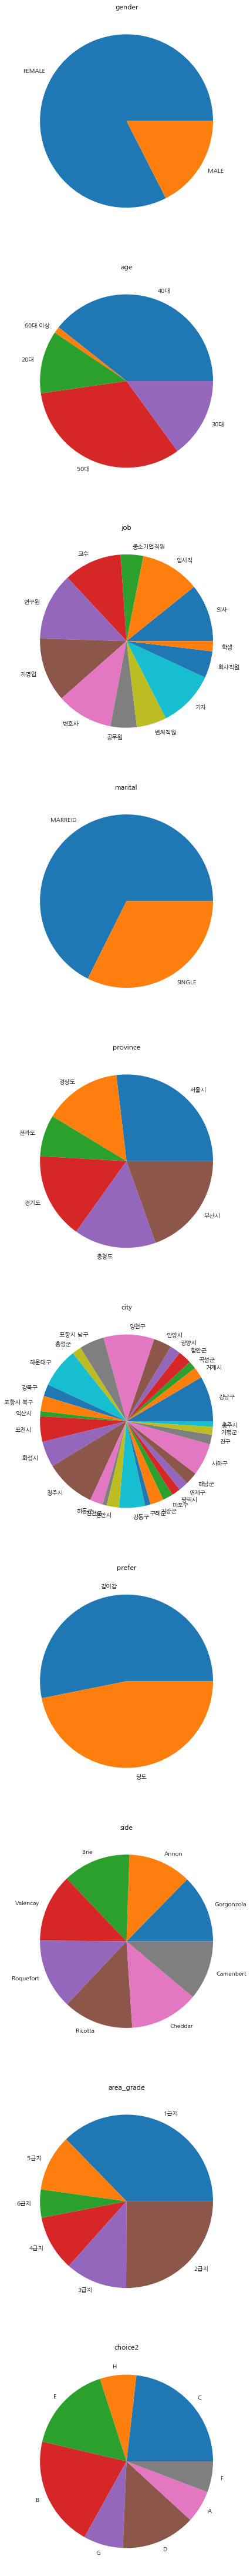

In [55]:
n_cat = [category for category in qq_wine['C'].columns if (category != 'choice1') and (qq_wine['C'][category].dtype == 'O')]
fig, ax = plt.subplots(len(n_cat), figsize = (80, 80))
for idx, cat in enumerate(n_cat):
    tmp_x = qq_wine['C'][cat].unique()
    tmp_y = [len(qq_wine['C'][qq_wine['C'][cat] == answer])for answer in tmp_x]
    ax[idx].pie(tmp_y, labels = tmp_x)
    ax[idx].set_title(f'{cat}')

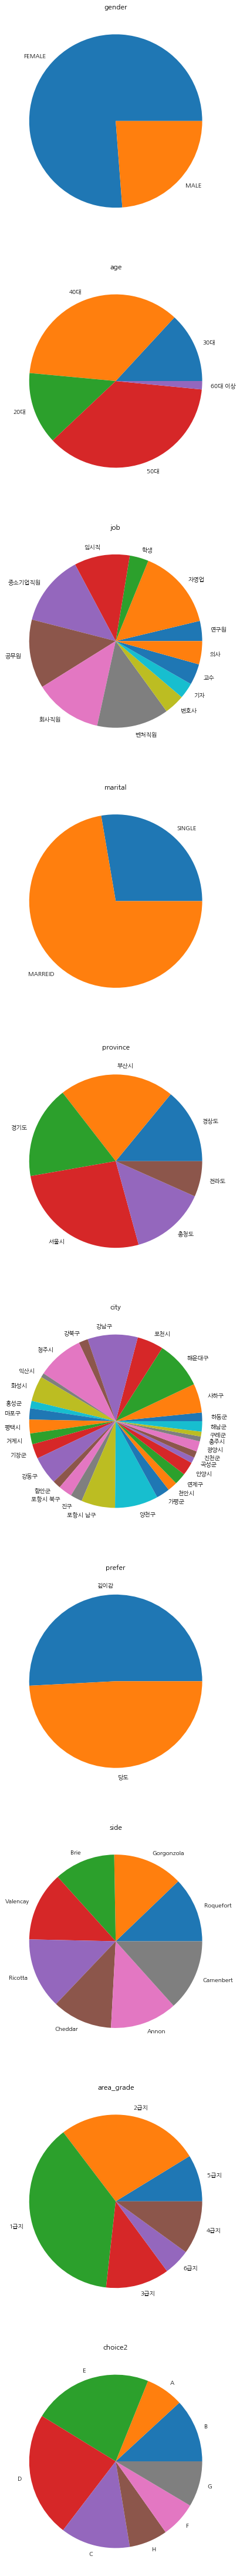

In [56]:
n_cat = [category for category in qq_wine['D'].columns if (category != 'choice1') and (qq_wine['D'][category].dtype == 'O')]
fig, ax = plt.subplots(len(n_cat), figsize = (80, 80))
for idx, cat in enumerate(n_cat):
    tmp_x = qq_wine['D'][cat].unique()
    tmp_y = [len(qq_wine['D'][qq_wine['D'][cat] == answer])for answer in tmp_x]
    ax[idx].pie(tmp_y, labels = tmp_x)
    ax[idx].set_title(f'{cat}')

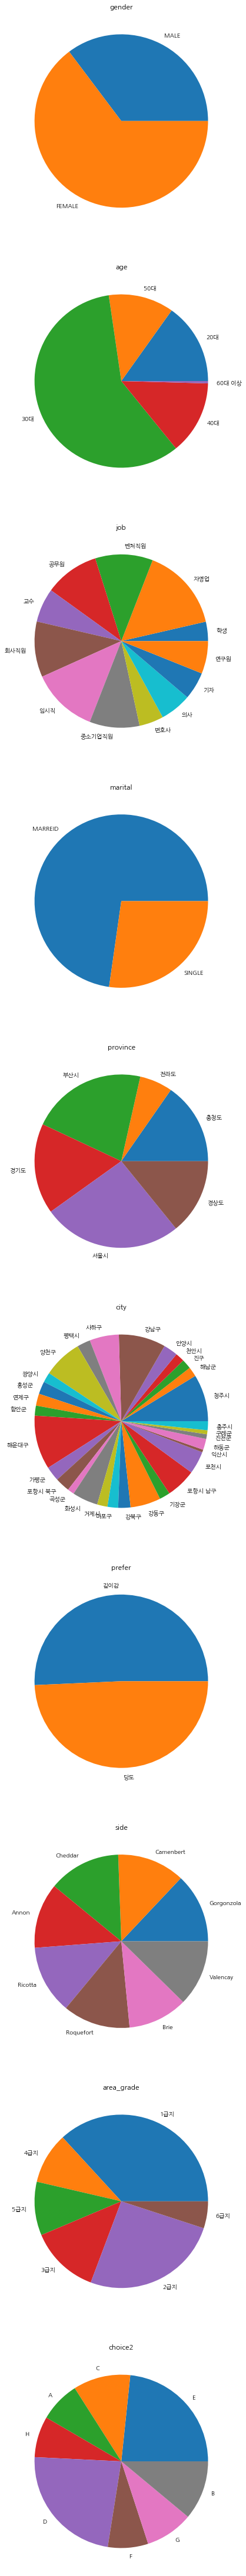

In [57]:
n_cat = [category for category in qq_wine['E'].columns if (category != 'choice1') and (qq_wine['E'][category].dtype == 'O')]
fig, ax = plt.subplots(len(n_cat), figsize = (80, 80))
for idx, cat in enumerate(n_cat):
    tmp_x = qq_wine['E'][cat].unique()
    tmp_y = [len(qq_wine['E'][qq_wine['E'][cat] == answer])for answer in tmp_x]
    ax[idx].pie(tmp_y, labels = tmp_x)
    ax[idx].set_title(f'{cat}')

In [58]:
n_cat = [category for category in qq_wine['F'].columns if (category != 'choice1') and (qq_wine['F'][category].dtype == 'O')]
fig, ax = plt.subplots(len(n_cat), figsize = (80, 80))
for idx, cat in enumerate(n_cat):
    tmp_x = qq_wine['F'][cat].unique()
    tmp_y = [len(qq_wine['F'][qq_wine['F'][cat] == answer])for answer in tmp_x]
    ax[idx].pie(tmp_y, labels = tmp_x)
    ax[idx].set_title(f'{cat}')

In [59]:
n_cat = [category for category in qq_wine['G'].columns if (category != 'choice1') and (qq_wine['G'][category].dtype == 'O')]
fig, ax = plt.subplots(len(n_cat), figsize = (80, 80))
for idx, cat in enumerate(n_cat):
    tmp_x = qq_wine['G'][cat].unique()
    tmp_y = [len(qq_wine['G'][qq_wine['G'][cat] == answer])for answer in tmp_x]
    ax[idx].pie(tmp_y, labels = tmp_x)
    ax[idx].set_title(f'{cat}')

In [60]:
n_cat = [category for category in qq_wine['H'].columns if (category != 'choice1') and (qq_wine['H'][category].dtype == 'O')]
fig, ax = plt.subplots(len(n_cat), figsize = (80, 80))
for idx, cat in enumerate(n_cat):
    tmp_x = qq_wine['H'][cat].unique()
    tmp_y = [len(qq_wine['H'][qq_wine['H'][cat] == answer])for answer in tmp_x]
    ax[idx].pie(tmp_y, labels = tmp_x)
    ax[idx].set_title(f'{cat}')

GENDER analysis
---------------------------------Group A report---------------------------------
[('MALE', 592, '72%'), ('FEMALE', 230, '27%')]
--------------------------------------------------------------------------------
---------------------------------Group B report---------------------------------
[('FEMALE', 1034, '70%'), ('MALE', 427, '29%')]
--------------------------------------------------------------------------------
---------------------------------Group C report---------------------------------
[('FEMALE', 958, '82%'), ('MALE', 203, '17%')]
--------------------------------------------------------------------------------
---------------------------------Group D report---------------------------------
[('FEMALE', 1423, '76%'), ('MALE', 444, '23%')]
--------------------------------------------------------------------------------
---------------------------------Group E report---------------------------------
[('MALE', 568, '35%'), ('FEMALE', 1043, '64%')]
-----------------

---------------------------------Group B report---------------------------------
[('사하구', 83, '5%'), ('강북구', 42, '2%'), ('강남구', 108, '7%'), ('양천구', 128, '8%'), ('거제시', 36, '2%'), ('안양시', 41, '2%'), ('청주시', 126, '8%'), ('포항시 남구', 72, '4%'), ('강동구', 81, '5%'), ('기장군', 37, '2%'), ('광양시', 33, '2%'), ('해운대구', 127, '8%'), ('화성시', 65, '4%'), ('포항시 북구', 38, '2%'), ('가평군', 34, '2%'), ('함안군', 32, '2%'), ('진천군', 14, '0%'), ('포천시', 79, '5%'), ('진구', 25, '1%'), ('구례군', 22, '1%'), ('익산시', 8, '0%'), ('홍성군', 41, '2%'), ('평택시', 32, '2%'), ('하동군', 30, '2%'), ('연제구', 18, '1%'), ('천안시', 30, '2%'), ('마포구', 24, '1%'), ('충주시', 13, '0%'), ('해남군', 25, '1%'), ('곡성군', 17, '1%')]
--------------------------------------------------------------------------------
---------------------------------Group C report---------------------------------
[('강남구', 98, '8%'), ('거제시', 24, '2%'), ('곡성군', 17, '1%'), ('함안군', 29, '2%'), ('광양시', 23, '1%'), ('안양시', 39, '3%'), ('양천구', 110, '9%'), ('포항시 남구', 54, '4%'), ('홍성군', 20, '1%'), (

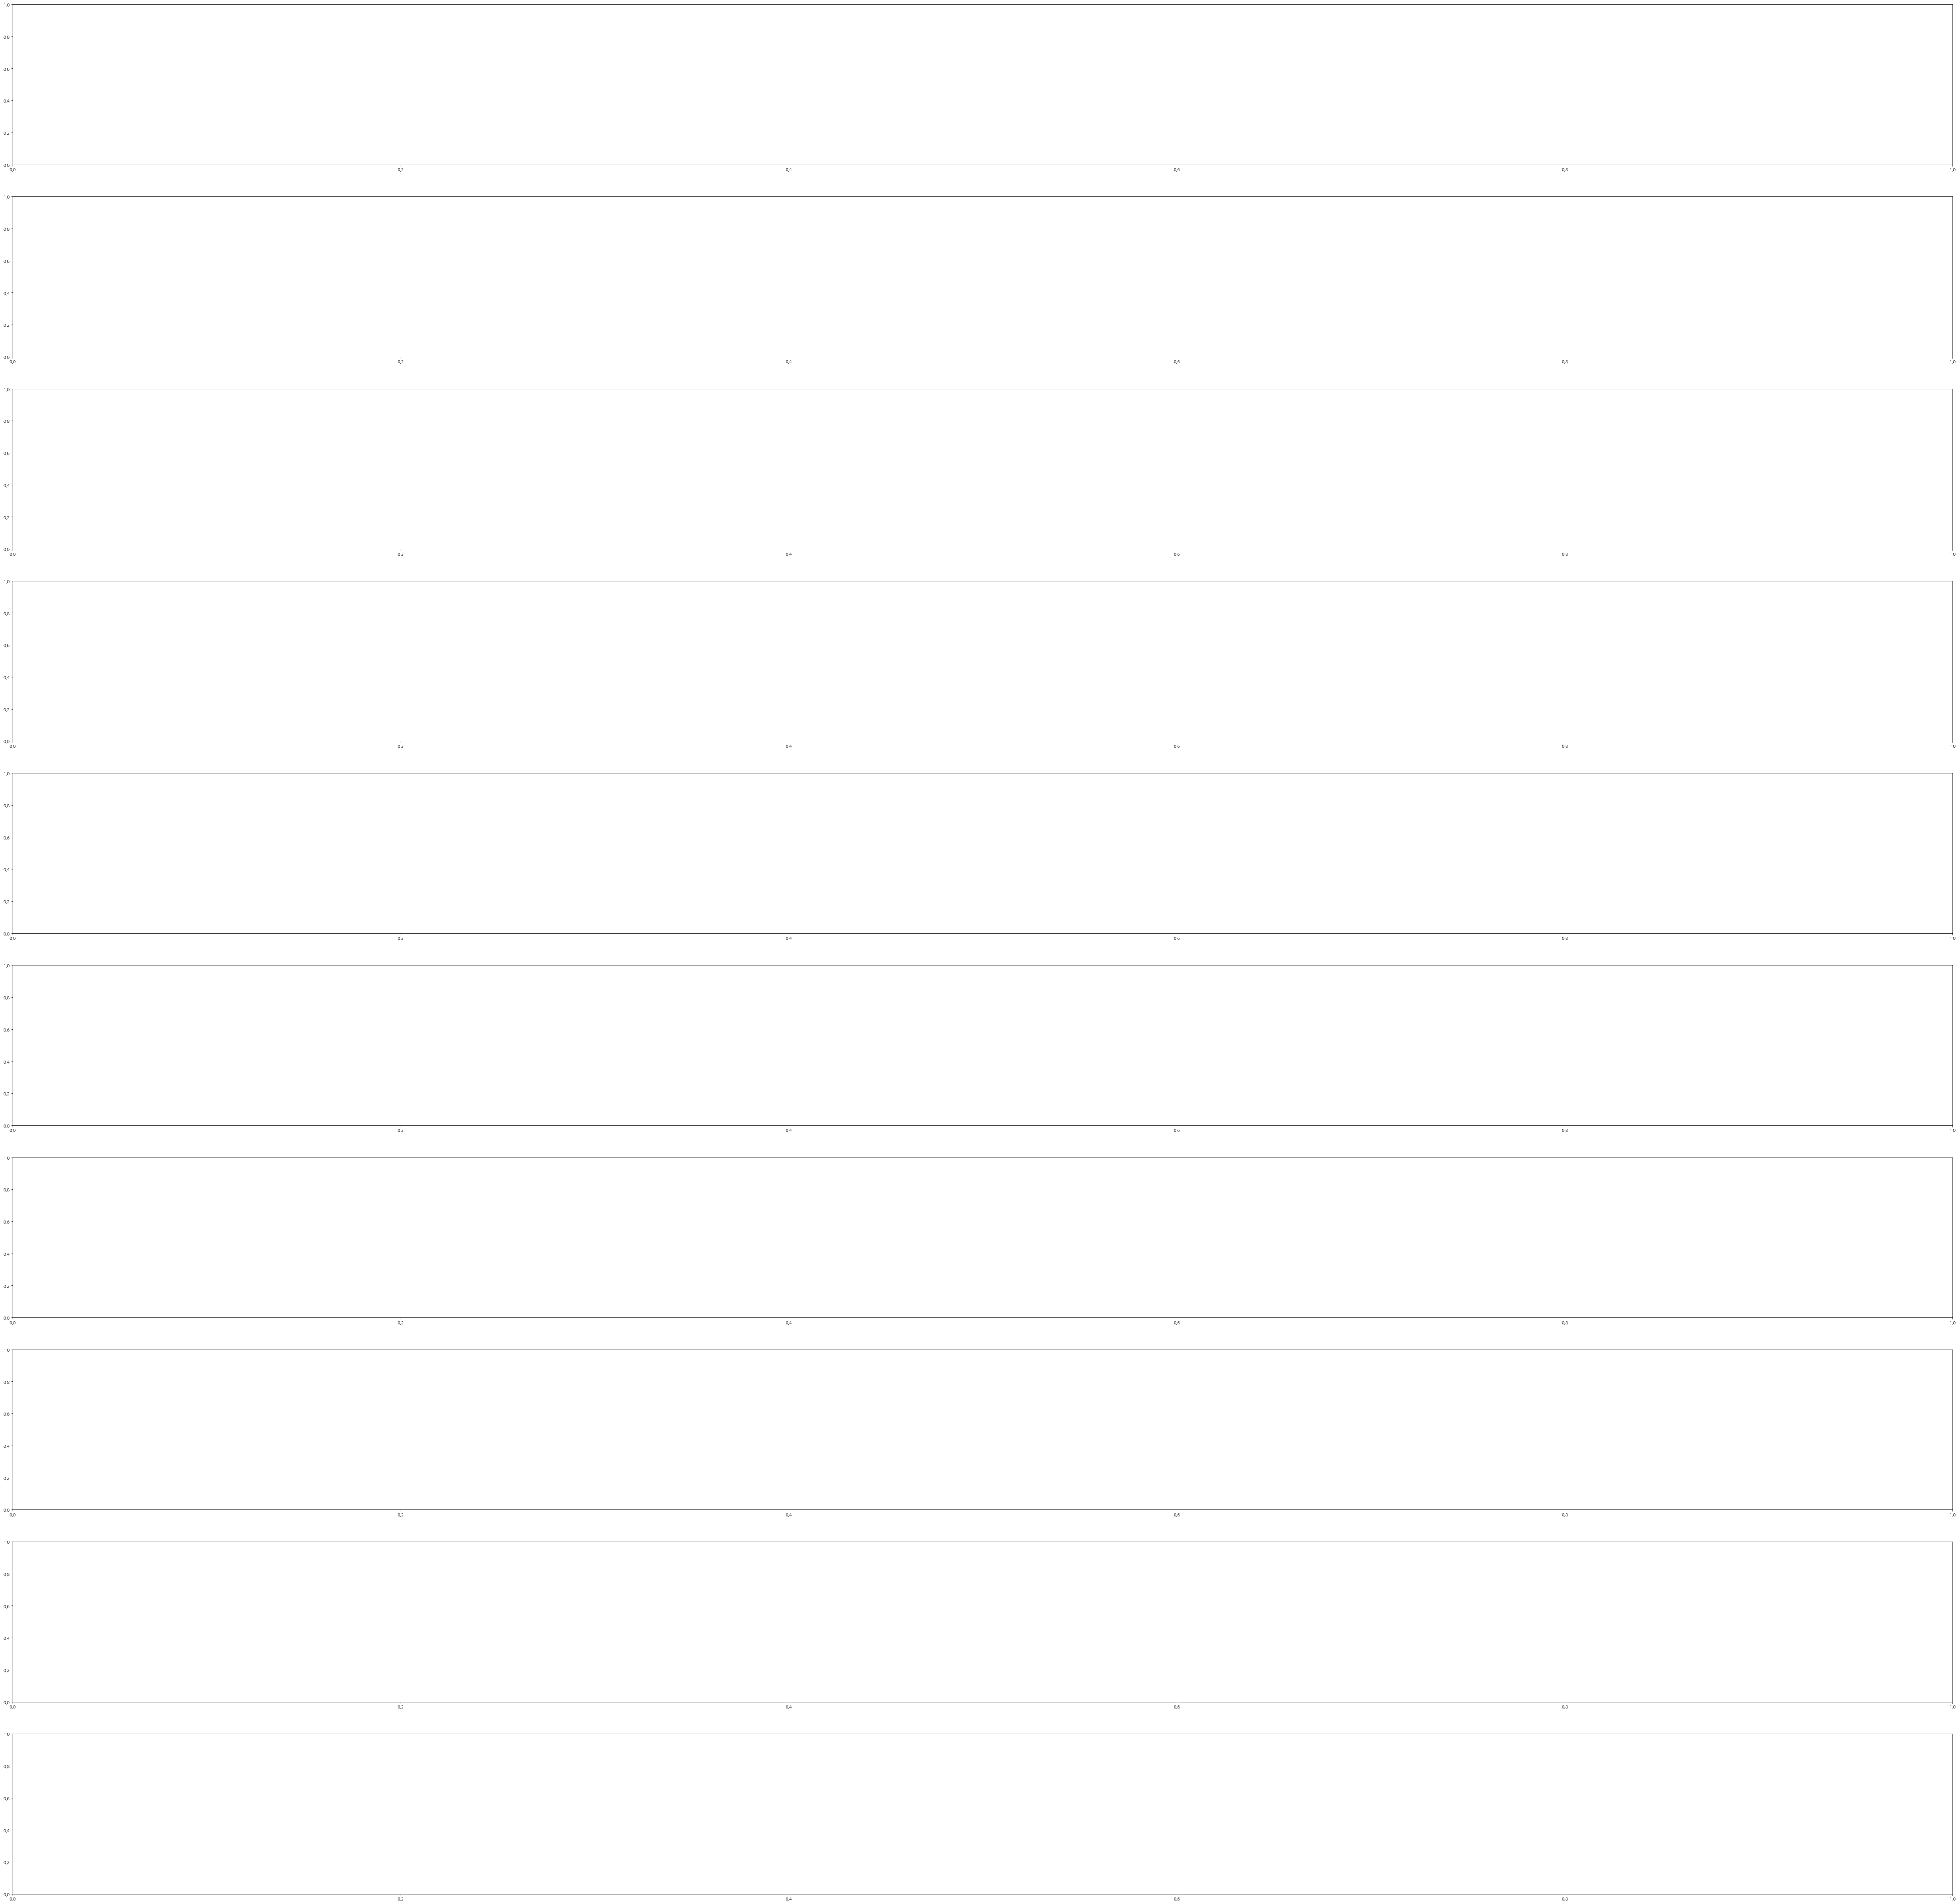

In [61]:
report = pd.DataFrame(index = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'))
qport = pd.DataFrame(index = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'))
n_cat = [category for category in qq_wine['H'].columns if (category != 'choice1') and (qq_wine['H'][category].dtype == 'O')]
fig, ax = plt.subplots(len(n_cat), figsize = (80, 80))
for idx, cat in enumerate(n_cat):
    print('='*80)
    print(f'{cat.upper()} analysis')
    for group in ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'):
        tmp_x = list(qq_wine[group][cat].unique())
        tmp_y = [len(qq_wine[group][qq_wine[group][cat] == answer]) for answer in tmp_x]
        tmp_z = [oioi/sum(tmp_y)*100 for oioi in tmp_y]
        tmp_Z = [str(int(oioi/sum(tmp_y)*100))+'%' for oioi in tmp_y]
        tmp = list(zip(tmp_x, tmp_y, tmp_Z))
        for sect in tmp_x:
            report.loc[group, cat+sect] = tmp_z[tmp_x.index(sect)]
            qport.loc[group, cat+sect] = tmp_y[tmp_x.index(sect)]
        print(f'{"-"*33}Group {group} report{"-"*33}')
        print(tmp)
        if group != 'H': print('-'*80)
    print('='*80)

In [62]:
report.T.round(2)

A      B      C      D      E      F      G      H
genderMALE      72.02  29.23  17.48  23.78  35.26  67.17  51.46  58.73
genderFEMALE    27.98  70.77  82.52  76.22  64.74  32.83  48.54  41.27
age50대          51.22  17.80  32.73  36.42  12.17  12.61  19.43  24.51
age30대          14.36  20.26  14.99  13.12  58.54  23.04  22.95  23.53
age40대          19.34  17.66  39.36  35.40  13.72  49.89  32.42  34.58
age20대          13.75  43.46  11.71  13.50  15.15  14.13  24.71  16.49
age60대 이상        1.34   0.82   1.21   1.55   0.43   0.33   0.49   0.89
job중소기업직원        8.88  11.64   4.22  13.23   9.31  11.85   5.08  11.85
job기자            6.81   1.98  10.59   2.95   5.15   4.46   4.69   2.58
job임시직          13.50  15.40  11.11  10.39  12.35  10.76  17.38  19.16
job회사직원          8.27  10.34   5.00  12.69  10.37  10.98   7.42  11.14
job연구원           5.35   2.40  12.58   3.75   6.08   7.17   3.71   2.14
job자영업          14.60  17.25  11.97  15.10  15.52  12.50  27.54  24.78
job벤처직원         10.71  10.95   5.60  13.44  10.74  12.17   7.13   9.98
job의사            5.35   1.92  10.77   4.34   5.83   5.00   6.74   2.05
job공무원           9.98  11.09   4.91  12.85  10.18  12.83   6.15  11.23
job교수            7.42   2.81  10.85   3.91   6.33   5.87   4.00   1.78
job학생            2.07  11.43   1.89   3.54   3.60   1.41   5.96   0.98
job변호사           7.06   2.81  10.51   3.80   4.53   5.00   4.20   2.32
maritalMARREID  71.29  68.24  67.61  72.31  72.75  79.35  63.57  57.22
maritalSINGLE   28.71  31.76  32.39  27.69  27.25  20.65  36.43  42.78
province부산시     18.61  19.85  19.55  21.48  21.54  22.28  20.31  19.61
province서울시     24.70  26.21  26.87  26.51  25.95  25.11  26.86  27.81
province충청도     16.67  15.33  15.33  14.09  15.33  16.41  13.38  15.15
province경상도     14.48  14.24  14.47  14.03  14.15  12.39  15.04  11.41
province경기도     18.73  17.18  16.02  17.25  16.88  16.85  18.55  18.72
province전라도      6.81   7.19   7.75   6.64   6.15   6.96   5.86   7.31
city해운대구         8.27   8.69   7.41   8.94  10.06   8.80   9.28   8.47
city강남구          8.64   7.39   8.44   9.37   8.75   8.04  10.45   9.71
city청주시         11.80   8.62   9.47   8.73   8.75  10.43   8.59   7.84
city사하구          3.89   5.68   6.03   5.41   5.46   5.43   4.20   5.61
city강동구          4.62   5.54   4.82   5.25   5.65   4.35   4.79   4.63
city함안군          1.46   2.19   2.50   1.50   1.86   1.30   1.37   1.78
city안양시          2.55   2.81   3.36   2.52   2.67   2.07   2.73   3.12
city양천구          7.66   8.76   9.47   8.09   7.26   8.80   7.52   8.29
city포항시 남구       5.47   4.93   4.65   6.32   5.59   5.11   4.79   4.99
city기장군          2.92   2.53   2.50   2.73   1.99   2.07   2.83   2.14
city마포구          1.46   1.64   1.89   2.09   1.99   2.07   2.05   2.05
city홍성군          1.95   2.81   1.72   1.39   2.36   1.52   1.86   2.58
city강북구          2.31   2.87   2.24   1.71   2.30   1.85   2.05   3.12
city가평군          2.55   2.33   1.46   2.52   2.73   2.61   3.32   2.14
city평택시          3.04   2.19   1.64   2.57   2.48   2.17   2.73   2.41
city진구           2.19   1.71   1.81   2.20   1.80   2.93   2.54   1.52
city연제구          1.34   1.23   1.81   2.20   2.23   3.04   1.46   1.87
city익산시          1.22   0.55   0.95   0.80   0.50   1.09   0.78   0.89
city하동군          2.31   2.05   2.41   1.61   2.05   1.20   3.03   1.34
city천안시          1.46   2.05   2.33   1.82   1.68   2.50   1.27   2.05
city포항시 북구       2.68   2.60   2.84   2.57   2.73   3.04   3.22   2.14
city포천시          5.35   5.41   4.74   4.93   4.22   5.11   4.30   5.97
city구례군          1.58   1.51   1.03   0.91   0.74   1.41   0.88   0.71
city해남군          1.46   1.71   2.33   1.93   1.80   2.07   2.05   2.67
city화성시          5.23   4.45   4.82   4.71   4.78   4.89   5.47   5.08
city거제시          2.55   2.46   2.07   2.04   1.92   1.74   2.64   1.16
city진천군          0.97   0.96   0.78   1.23   0.87   1.20   0.49   1.34
city광양시          1.82   2.26   1.98   1.93   1.86   1.20   1.66   2.14
city충주시          0.49   0.89   1.03   0.91  

In [63]:
len(report.T.index)

81

In [64]:
now_idx = report.T.index[:41]
fig, ax = plt.subplots(int((len(list(now_idx))+1)/2), 2, figsize = (40*((len(now_idx)+1)/2), 160))
for idx, cat in enumerate(now_idx):
    ax[int(idx/2)][idx%2].pie(report.T.loc[cat], labels = report.T.columns)
    ax[int(idx/2)][idx%2].set_title(cat)

In [65]:
later_idx = report.T.index[41:]
fig, ax = plt.subplots(int((len(list(later_idx))+1)/2), 2, figsize = (40*((len(later_idx)+1)/2), 40))
for idx, cat in enumerate(later_idx):
    ax[int(idx/2)][idx%2].pie(report.T.loc[cat], labels = report.T.columns)
    ax[int(idx/2)][idx%2].set_title(cat)

In [66]:
# oooo = report.T.index[0]
# plt.pie(report.T.loc[oooo], labels = report.T.columns)
# plt.set_title(report.)

In [50]:
qn = qq.drop(['prefer', 'side', 'seq'], axis = 1, inplace = False)

In [69]:
qn['job'].unique()

array(['중소기업직원', '연구원', '자영업', '의사', '회사직원', '임시직', '학생', '벤처직원', '기자',
       '공무원', '변호사', '교수'], dtype=object)

In [51]:
job_dict = dict()
job_dict['중소기업직원'] = '중급'
job_dict['벤처직원'] = '중급'
job_dict['회사직원'] = '중급'
job_dict['연구원'] = '고급'
job_dict['의사'] = '고급'
job_dict['변호사'] = '고급'
job_dict['교수'] = '고급'
job_dict['기자'] = '고급'
job_dict['자영업'] = '프리'
job_dict['임시직'] = '프리'
job_dict['학생'] = '학생'
job_dict['공무원'] = '갓'

qn['job_group'] = qn['job'].apply((lambda x:job_dict[x]))
qn.drop('job', axis = 1, inplace = True)


In [52]:
qn.head()

gender  age  marital province  city  frequency  wineFrequency choice1  \
0    MALE  50대  MARREID      부산시  해운대구          5              4       A   
1  FEMALE  30대   SINGLE      경상도   하동군          2              1       D   
2  FEMALE  30대  MARREID      부산시   사하구          4              1       B   
3  FEMALE  40대  MARREID      부산시   사하구          1              1       D   
4  FEMALE  40대  MARREID      서울시   강남구          1              1       C   

  area_grade choice2 job_group  
0        1급지       A        중급  
1        5급지       B        고급  
2        2급지       G        프리  
3        2급지       B        프리  
4        1급지       C        고급

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [54]:
qn_y = qn[['choice1']]
qn_x = qn.drop('choice1', axis = 1, inplace = False)
qn_x = pd.get_dummies(qn_x)
qn_train_x, qn_test_x, qn_train_y, qn_test_y = train_test_split(qn_x, qn_y, test_size = 0.3)

In [55]:
v_feature_names = qn_train_x.columns
scaler = StandardScaler()
qn_x = scaler.fit_transform(qn_x)
qn_x = pd.DataFrame(qn_x, columns=v_feature_names)
qn_train_x, qn_test_x, qn_train_y, qn_test_y = train_test_split(qn_x, qn_y, test_size = 0.3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 's

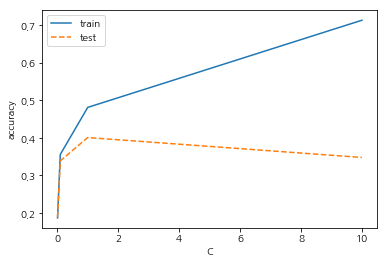

In [75]:
train_acc = list()
test_acc = list()
para_C = [10 ** C for C in range(-2, 2)]
for v_C in para_C:
    svm = SVC(C = v_C, random_state = 777)
    svm.fit(qn_train_x, qn_train_y)
    train_acc.append(svm.score(qn_train_x, qn_train_y))
    test_acc.append(svm.score(qn_test_x, qn_test_y))
    
df_accuracy = pd.DataFrame()
df_accuracy['C'] = para_C
df_accuracy['train'] = train_acc
df_accuracy['test'] = test_acc
plt.plot(para_C, train_acc, linestyle = '-', label = 'train')
plt.plot(para_C, test_acc, linestyle = '--', label = 'test')
plt.ylabel('accuracy')
plt.xlabel('C')
plt.legend()

In [ ]:
#C = 1

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

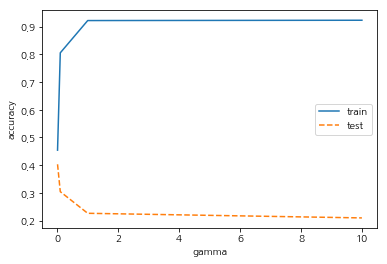

In [76]:
train_acc = list()
test_acc = list()
para_gamma = [10 ** gamma for gamma in range(-2, 2)]
for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 1, random_state = 777)
    svm.fit(qn_train_x, qn_train_y)
    train_acc.append(svm.score(qn_train_x, qn_train_y))
    test_acc.append(svm.score(qn_test_x, qn_test_y))
    
df_accuracy = pd.DataFrame()
df_accuracy['gamma'] = para_gamma
df_accuracy['train'] = train_acc
df_accuracy['test'] = test_acc
plt.plot(para_gamma, train_acc, linestyle = '-', label = 'train')
plt.plot(para_gamma, test_acc, linestyle = '--', label = 'test')
plt.ylabel('accuracy')
plt.xlabel('gamma')
plt.legend()

In [77]:
df_accuracy.round(3)

gamma  train   test
0   0.01  0.454  0.403
1   0.10  0.805  0.304
2   1.00  0.922  0.226
3  10.00  0.923  0.210

In [56]:
#gamma = 0.01
svc_fin = SVC(gamma = 0.01, C = 1, random_state = 777)
svc_fin.fit(qn_train_x, qn_train_y)
submit.loc[0, 'TrainAccuracy'] = svc_fin.score(qn_train_x, qn_train_y)
submit.loc[0, 'TestAccuracy'] = svc_fin.score(qn_test_x, qn_test_y)
submit.loc[0, 'F1Score'] = f1_score(qn_test_y, svc_fin.predict(qn_test_x), average = 'weighted')

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
submit.drop([4,5,6,7,8,9], axis = 0, inplace = True)
submit.index = ['SVM', 'DecisionTree', 'RandomForest', 'GradientBoosting']

In [60]:
submit.head()

TrainAccuracy  TestAccuracy  F1Score
SVM                    0.456571      0.414333  0.41113
DecisionTree                NaN           NaN      NaN
RandomForest                NaN           NaN      NaN
GradientBoosting            NaN           NaN      NaN

In [62]:
para_depth = [depth for depth in range(1, 15)]
train = list()
test = list()

for depth in para_depth:
    tree = DecisionTreeClassifier(random_state = 777, max_depth = depth)
    tree.fit(qn_train_x, qn_train_y)
    train.append(tree.score(qn_train_x, qn_train_y))
    test.append(tree.score(qn_test_x, qn_test_y))
    
result = pd.DataFrame()
result['depth'] = para_depth
result['train'] = train
result['test'] = test
result.round(3)



depth  train   test
0       1  0.258  0.252
1       2  0.276  0.275
2       3  0.343  0.348
3       4  0.376  0.366
4       5  0.426  0.414
5       6  0.448  0.434
6       7  0.459  0.425
7       8  0.476  0.419
8       9  0.492  0.418
9      10  0.515  0.413
10     11  0.538  0.398
11     12  0.566  0.394
12     13  0.596  0.385
13     14  0.627  0.372

In [63]:
para_split = [split*2 for split in range(1, 15)]
train = list()
test = list()

for split in para_split:
    tree = DecisionTreeClassifier(random_state = 777, min_samples_split=split, max_depth = 5)
    tree.fit(qn_train_x, qn_train_y)
    train.append(tree.score(qn_train_x, qn_train_y))
    test.append(tree.score(qn_test_x, qn_test_y))
    
result = pd.DataFrame()
result['split'] = para_split
result['train'] = train
result['test'] = test
result.round(3)



split  train   test
0       2  0.426  0.414
1       4  0.426  0.414
2       6  0.426  0.414
3       8  0.426  0.414
4      10  0.426  0.414
5      12  0.426  0.414
6      14  0.426  0.414
7      16  0.426  0.414
8      18  0.426  0.414
9      20  0.426  0.414
10     22  0.426  0.414
11     24  0.426  0.414
12     26  0.426  0.414
13     28  0.426  0.415

In [64]:
para_leaf = [leaf*2 for leaf in range(1, 15)]
train = list()
test = list()

for leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 777, min_samples_leaf=leaf, max_depth = 5)
    tree.fit(qn_train_x, qn_train_y)
    train.append(tree.score(qn_train_x, qn_train_y))
    test.append(tree.score(qn_test_x, qn_test_y))
    
result = pd.DataFrame()
result['leaf'] = para_leaf
result['train'] = train
result['test'] = test
result.round(3)



leaf  train   test
0      2  0.426  0.414
1      4  0.426  0.414
2      6  0.426  0.415
3      8  0.426  0.415
4     10  0.426  0.415
5     12  0.426  0.415
6     14  0.425  0.416
7     16  0.425  0.416
8     18  0.425  0.416
9     20  0.425  0.416
10    22  0.425  0.416
11    24  0.425  0.416
12    26  0.424  0.415
13    28  0.424  0.415

In [65]:
submit.head()

TrainAccuracy  TestAccuracy  F1Score
SVM                    0.456571      0.414333  0.41113
DecisionTree                NaN           NaN      NaN
RandomForest                NaN           NaN      NaN
GradientBoosting            NaN           NaN      NaN

In [67]:
tree_fin = DecisionTreeClassifier(max_depth = 4, min_samples_leaf=12)
tree_fin.fit(qn_train_x, qn_train_y)
submit.loc['DecisionTree', 'TrainAccuracy'] = tree_fin.score(qn_train_x, qn_train_y)
submit.loc['DecisionTree', 'TestAccuracy'] = tree_fin.score(qn_test_x, qn_test_y)
submit.loc['DecisionTree', 'F1Score'] = f1_score(qn_test_y, tree_fin.predict(qn_test_x), average = 'weighted')

In [68]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [72]:
para_estimator = [estimator for estimator in range(1, 15)]
train = list()
test = list()

for estimator in para_estimator:
    tree = RandomForestClassifier(random_state = 777, n_estimators = estimator)
    tree.fit(qn_train_x, qn_train_y)
    train.append(tree.score(qn_train_x, qn_train_y))
    test.append(tree.score(qn_test_x, qn_test_y))
    
result = pd.DataFrame()
result['estimator'] = para_estimator
result['train'] = train
result['test'] = test
result.round(3)



/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/home/pirl/anaconda3/lib/python3

estimator  train   test
0           1  0.694  0.300
1           2  0.706  0.303
2           3  0.790  0.311
3           4  0.832  0.324
4           5  0.854  0.341
5           6  0.869  0.336
6           7  0.879  0.338
7           8  0.888  0.346
8           9  0.894  0.350
9          10  0.897  0.348
10         11  0.900  0.356
11         12  0.901  0.354
12         13  0.903  0.354
13         14  0.905  0.358

In [73]:
para_split = [split * 2 for split in range(1, 15)]
train = list()
test = list()

for split in para_split:
    tree = RandomForestClassifier(random_state = 777, min_samples_split = split, n_estimators = 9)
    tree.fit(qn_train_x, qn_train_y)
    train.append(tree.score(qn_train_x, qn_train_y))
    test.append(tree.score(qn_test_x, qn_test_y))
    
result = pd.DataFrame()
result['split'] = para_split
result['train'] = train
result['test'] = test
result.round(3)



/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/home/pirl/anaconda3/lib/python3

split  train   test
0       2  0.894  0.350
1       4  0.802  0.370
2       6  0.731  0.392
3       8  0.683  0.397
4      10  0.653  0.405
5      12  0.626  0.410
6      14  0.605  0.415
7      16  0.589  0.414
8      18  0.580  0.421
9      20  0.574  0.417
10     22  0.559  0.425
11     24  0.551  0.422
12     26  0.545  0.421
13     28  0.541  0.422

In [74]:
para_leaf = [leaf * 2 for leaf in range(1, 15)]
train = list()
test = list()

for leaf in para_leaf:
    tree = RandomForestClassifier(random_state = 777, min_samples_leaf = leaf, n_estimators = 9, min_samples_split=14)
    tree.fit(qn_train_x, qn_train_y)
    train.append(tree.score(qn_train_x, qn_train_y))
    test.append(tree.score(qn_test_x, qn_test_y))
    
result = pd.DataFrame()
result['leaf'] = para_leaf
result['train'] = train
result['test'] = test
result.round(3)



/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/home/pirl/anaconda3/lib/python3

leaf  train   test
0      2  0.571  0.424
1      4  0.539  0.420
2      6  0.511  0.424
3      8  0.497  0.429
4     10  0.480  0.427
5     12  0.468  0.429
6     14  0.457  0.429
7     16  0.449  0.422
8     18  0.453  0.421
9     20  0.448  0.424
10    22  0.442  0.427
11    24  0.437  0.423
12    26  0.435  0.428
13    28  0.436  0.423

In [75]:
rf_fin = RandomForestClassifier(random_state = 777, min_samples_leaf = 8, n_estimators = 9, min_samples_split=14)
rf_fin.fit(qn_train_x, qn_train_y)
submit.loc['RandomForest', 'TrainAccuracy'] = rf_fin.score(qn_train_x, qn_train_y)
submit.loc['RandomForest', 'TestAccuracy'] = rf_fin.score(qn_test_x, qn_test_y)
submit.loc['RandomForest', 'F1Score'] = f1_score(qn_test_y, rf_fin.predict(qn_test_x), average = 'weighted')

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [76]:
submit.head()

TrainAccuracy  TestAccuracy   F1Score
SVM                    0.456571      0.414333  0.411130
DecisionTree           0.375857      0.366000  0.358525
RandomForest           0.497286      0.428667  0.427909
GradientBoosting            NaN           NaN       NaN

In [77]:
para_estimator = [estimator for estimator in range(1, 15)]
train = list()
test = list()

for estimator in para_estimator:
    tree = GradientBoostingClassifier(random_state = 777, n_estimators = estimator)
    tree.fit(qn_train_x, qn_train_y)
    train.append(tree.score(qn_train_x, qn_train_y))
    test.append(tree.score(qn_test_x, qn_test_y))
    
result = pd.DataFrame()
result['estimator'] = para_estimator
result['train'] = train
result['test'] = test
result.round(3)



/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

estimator  train   test
0           1  0.411  0.418
1           2  0.410  0.421
2           3  0.414  0.423
3           4  0.419  0.427
4           5  0.416  0.422
5           6  0.416  0.421
6           7  0.419  0.424
7           8  0.419  0.423
8           9  0.417  0.419
9          10  0.422  0.420
10         11  0.426  0.420
11         12  0.427  0.422
12         13  0.427  0.422
13         14  0.430  0.426

In [79]:
para_split = [split * 2 for split in range(1, 15)]
train = list()
test = list()

for split in para_split:
    tree = GradientBoostingClassifier(random_state = 777, min_samples_split = split, n_estimators = 4)
    tree.fit(qn_train_x, qn_train_y)
    train.append(tree.score(qn_train_x, qn_train_y))
    test.append(tree.score(qn_test_x, qn_test_y))
    
result = pd.DataFrame()
result['split'] = para_split
result['train'] = train
result['test'] = test
result.round(3)



/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

split  train   test
0       2  0.419  0.427
1       4  0.419  0.427
2       6  0.419  0.427
3       8  0.419  0.427
4      10  0.419  0.427
5      12  0.419  0.427
6      14  0.419  0.427
7      16  0.419  0.427
8      18  0.419  0.427
9      20  0.419  0.427
10     22  0.419  0.427
11     24  0.419  0.427
12     26  0.419  0.427
13     28  0.419  0.427

In [80]:
para_leaf = [leaf * 2 for leaf in range(1, 15)]
train = list()
test = list()

for leaf in para_leaf:
    tree = GradientBoostingClassifier(random_state = 777, min_samples_leaf = leaf, n_estimators = 9,)
    tree.fit(qn_train_x, qn_train_y)
    train.append(tree.score(qn_train_x, qn_train_y))
    test.append(tree.score(qn_test_x, qn_test_y))
    
result = pd.DataFrame()
result['leaf'] = para_leaf
result['train'] = train
result['test'] = test
result.round(3)



/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

leaf  train   test
0      2  0.417  0.419
1      4  0.417  0.420
2      6  0.417  0.421
3      8  0.417  0.421
4     10  0.417  0.421
5     12  0.418  0.422
6     14  0.418  0.422
7     16  0.418  0.421
8     18  0.418  0.422
9     20  0.418  0.422
10    22  0.417  0.421
11    24  0.417  0.422
12    26  0.417  0.420
13    28  0.417  0.420

In [82]:
gd_fin = GradientBoostingClassifier(random_state = 777, min_samples_leaf = 4, n_estimators = 9)
gd_fin.fit(qn_train_x, qn_train_y)
submit.loc['GradientBoosting', 'TrainAccuracy'] = gd_fin.score(qn_train_x, qn_train_y)
submit.loc['GradientBoosting', 'TestAccuracy'] = gd_fin.score(qn_test_x, qn_test_y)
submit.loc['GradientBoosting', 'F1Score'] = f1_score(qn_test_y, gd_fin.predict(qn_test_x), average = 'weighted')

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
submit

TrainAccuracy  TestAccuracy   F1Score
SVM                    0.456571      0.414333  0.411130
DecisionTree           0.375857      0.366000  0.358525
RandomForest           0.497286      0.428667  0.427909
GradientBoosting       0.417143      0.420333  0.414120

In [85]:
qn_test_y['choice1'].unique()

array(['A', 'F', 'C', 'D', 'G', 'H', 'E', 'B'], dtype=object)

In [87]:
qn_test_y_dummy = pd.get_dummies(qn_test_y)
qn_train_y_dummy = pd.get_dummies(qn_train_y)

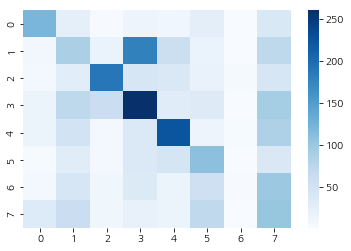

In [91]:
sns.heatmap(confusion_matrix(qn_test_y, tree_fin.predict(qn_test_x)), cmap = 'Blues')

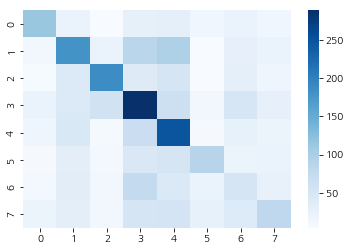

In [92]:
sns.heatmap(confusion_matrix(qn_test_y, svc_fin.predict(qn_test_x)), cmap = 'Blues')

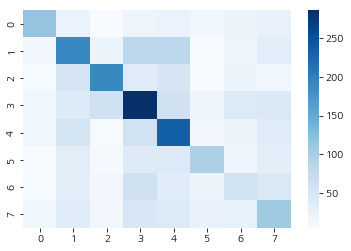

In [93]:
sns.heatmap(confusion_matrix(qn_test_y, rf_fin.predict(qn_test_x)), cmap = 'Blues')

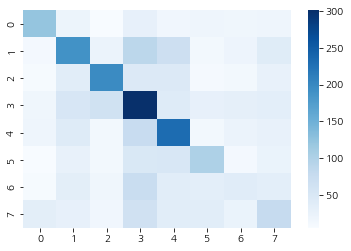

In [94]:
sns.heatmap(confusion_matrix(qn_test_y, gd_fin.predict(qn_test_x)), cmap = 'Blues')

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [97]:
n_classes = 8
qn_train_y_dummy = pd.get_dummies(qn_train_y)
qn_test_y_dummy = pd.get_dummies(qn_test_y)
y_score = svc_fin.fit(qn_train_x, qn_train_y_dummy).decision_function(qn_test_x)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(qn_test_y_dummy[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(qn_test_y_dummy.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

ValueError: bad input shape (7000, 8)

In [98]:
submit

TrainAccuracy  TestAccuracy   F1Score
SVM                    0.456571      0.414333  0.411130
DecisionTree           0.375857      0.366000  0.358525
RandomForest           0.497286      0.428667  0.427909
GradientBoosting       0.417143      0.420333  0.414120

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import graphviz

In [ ]:
qn_train_x.columns

In [ ]:
qn.head()

In [ ]:
qqq

In [79]:
qn.head()

gender  age  marital province  city  frequency  wineFrequency choice1  \
0    MALE  50대  MARREID      부산시  해운대구          5              4       A   
1  FEMALE  30대   SINGLE      경상도   하동군          2              1       D   
2  FEMALE  30대  MARREID      부산시   사하구          4              1       B   
3  FEMALE  40대  MARREID      부산시   사하구          1              1       D   
4  FEMALE  40대  MARREID      서울시   강남구          1              1       C   

  area_grade choice2 job_group  
0        1급지       A        중급  
1        5급지       B        고급  
2        2급지       G        프리  
3        2급지       B        프리  
4        1급지       C        고급

In [82]:
# qqq_x = qn[['gender', 'age', 'job_group', 'marital', 'frequency', 'wineFrequency']]
qqq_x = qn[['gender', 'age', 'job_group', 'marital',]]
qqq_y = qn[['choice1']]

qqq_x = pd.get_dummies(qqq_x)

qqq_train_x, qqq_test_x, qqq_train_y, qqq_test_y = train_test_split(qqq_x, qqq_y, test_size = 0.3)

# qqq_train_x['wine_lover'] = qqq_train_x['wineFrequency'] / qqq_train_x['frequency']
# qqq_test_x['wine_lover'] = qqq_test_x['wineFrequency'] / qqq_test_x['frequency']

# qqq_train_x['wine_lover'].fillna(0)
# qqq_test_x['wine_lover'].fillna(0)

# qqq_train_x.drop(['wineFrequency', 'frequency'], axis = 1, inplace = True)
# qqq_test_x.drop(['wineFrequency', 'frequency'], axis = 1, inplace = True)

In [83]:
# qqq_train_x['wine_lover'].unique()

In [84]:
# qqq_train_x[qqq_train_x.isnull()['wine_lover'] == True]['wine_lover'] = 0

In [85]:
# for idx in qqq_train_x[qqq_train_x.isnull()['wine_lover']==True]['wine_lover'].index:
#     qqq_train_x.loc[idx, 'wine_lover'] = 0

In [86]:
# qqq_train_x.drop('wine_lover', axis = 1, inplace = True)
estimator = DecisionTreeClassifier()

para_depth = [depth for depth in range(1, 16)]
para_split = [split * 2 for split in range(1, 11)]
para_leaf = [leaf for leaf in range(5, 30)]

param_grid = {'max_depth':para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(qqq_train_x, qqq_train_y)

print(f'best model:\n{grid_dt.best_estimator_}')
print(f'best parameter:\n{grid_dt.best_params_}')
print(f'best score:\n{grid_dt.best_score_.round(3)}')

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best model:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=22, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
best parameter:
{'max_depth': 7, 'min_samples_leaf': 22, 'min_samples_split': 2}
best score:
0.432


In [94]:
type(grid_dt.best_estimator_)

sklearn.tree.tree.DecisionTreeClassifier

In [95]:
print(classification_report(qqq_test_y, grid_dt.best_estimator_.predict(qqq_test_x)))

              precision    recall  f1-score   support

           A       0.55      0.35      0.43       254
           B       0.29      0.44      0.35       404
           C       0.56      0.43      0.49       342
           D       0.49      0.48      0.49       592
           E       0.42      0.53      0.47       473
           F       0.51      0.37      0.43       286
           G       0.35      0.18      0.24       299
           H       0.31      0.37      0.34       347

   micro avg       0.41      0.41      0.41      2997
   macro avg       0.43      0.39      0.40      2997
weighted avg       0.43      0.41      0.41      2997



In [103]:
from sklearn.preprocessing import binarize

In [104]:
model = ['DecisionTree', 'RandomForest', 'GradientBoosting', 'SVM']
train_accuracy = []
test_accuracy = []
model_f1_score = []
model_auc = []
qn_train_y = binarize(qn_train_y)
qn_test_y = binarize(qn_test_y)

ValueError: could not convert string to float: 'E'

In [100]:
for idx, group in enumerate(sorted(qn_train_y['choice1'].unique())):
    index = qn_train_y

train_accuracy.append(tree_fin.score(qn_train_x, qn_train_y))
test_accuracy.append(tree_fin.score(qn_test_x, qn_test_y))
fpr, tpr, thresholds = roc_curve(qn_test_y, tree_fin.predict(qn_test_x))
roc_auc = auc(fpr, tpr)
model_auc.append(roc_auc)

ValueError: multiclass format is not supported

In [ ]:
qqq_list = list()
qqq_list.append(qqq_train_x[(qqq_train_x['job_교수'] == 1) | (qqq_train_x['job_기자'] == 1) | (qqq_train_x['job_변호사'] == 1) | (qqq_train_x['job_연구원'] == 1) | (qqq_train_x['job_의사'] == 1)])
qqq_list.append(qqq_train_x[(qqq_train_x['job_벤처직원'] == 1) | (qqq_train_x['job_중소기업직원'] == 1) | (qqq_train_x['job_회사직원'] == 1)])
qqq_list.append(qqq_train_x[(qqq_train_x['job_임시직'] == 1) | (qqq_train_x['job_자영업'] == 1)])
qqq_list.append(qqq_train_x[(qqq_train_x['job_학생'] == 1)])
qqq_list.append(qqq_train_x[(qqq_train_x['job_공무원'] == 1)])

for idx, data in enumerate(qqq_list):
    for idx2 in data.index:
        qqq_train_x.loc[idx2, 'new_job'] = idx



In [ ]:
print(f"f1 score:\n{f1_score(qn_test_y, grid_dt.predict(qn_test_x), average='weighted')}")

In [ ]:
tree = DecisionTreeClassifier(max_depth=13, min_samples_leaf=5, min_samples_split=14, random_state=777)
export_graphviz(grid_dt.best_estimator_, out_file='tree_now.dot', class_names=list(map(str, qqq_train_y['choice1'].unique())), feature_names = qqq_train_x.columns, impurity = True, filled = True)
with open('tree_now.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
estimator = RandomForestClassifier()

para_depth = [depth for depth in range(1, 16)]
para_split = [split * 2 for split in range(1, 11)]
para_leaf = [leaf for leaf in range(5, 30)]

param_grid = {'max_depth':para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(qn_train_x, qn_train_y)

print(f'best model:\n{grid_dt.best_estimator_}')
print(f'best parameter:\n{grid_dt.best_params_}')
print(f'best score:\n{grid_dt.best_score_.round(3)}')
print(f"f1 score:\n{f1_score(qn_test_y, grid_dt.predict(qn_test_x), average='weighted')}")

In [ ]:
train_acc = list()
test_acc = list()

para_tree = [tree * 10 for tree in range(1, 16)]

for tree in para_tree:
    gb = GradientBoostingClassifier(n_estimators=tree, random_state=777)
    gb.fit(qn_train_x, qn_train_y)
    train_acc.append(gb.score(qn_train_x, qn_train_y))
    test_acc.append(gb.score(qn_test_x, qn_test_y))
    
df_acc = pd.DataFrame()
df_acc['tree'] = para_tree
df_acc['train'] = train_acc
df_acc['test'] = test_acc

df_acc.round(3)



In [ ]:
plt.plot(para_tree, train_acc, linestyle = '-', label = 'train')
plt.plot(para_tree, test_acc, linestyle = '--', label = 'test')
plt.ylabel('accuracy')
plt.xlabel('tree')
plt.legend()

In [ ]:
# n_estimator = 20

In [ ]:
train_acc = list()
test_acc = list()

para_depth = [depth for depth in range(1, 16)]

for depth in para_depth:
    gb = GradientBoostingClassifier(n_estimators=20, random_state=777, max_depth=depth)
    gb.fit(qn_train_x, qn_train_y)
    train_acc.append(gb.score(qn_train_x, qn_train_y))
    test_acc.append(gb.score(qn_test_x, qn_test_y))
    
df_acc = pd.DataFrame()
df_acc['depth'] = para_depth
df_acc['train'] = train_acc
df_acc['test'] = test_acc

df_acc.round(3)



In [ ]:
plt.plot(para_depth, train_acc, linestyle = '-', label = 'train')
plt.plot(para_depth, test_acc, linestyle = '--', label = 'test')
plt.ylabel('accuracy')
plt.xlabel('tree')
plt.legend()

In [ ]:
# depth == 3

In [ ]:
train_acc = list()
test_acc = list()

para_split = [split*2 for split in range(1, 16)]

for split in para_split:
    gb = GradientBoostingClassifier(n_estimators=20, random_state=777, max_depth=3, min_samples_split=split)
    gb.fit(qn_train_x, qn_train_y)
    train_acc.append(gb.score(qn_train_x, qn_train_y))
    test_acc.append(gb.score(qn_test_x, qn_test_y))
    
df_acc = pd.DataFrame()
df_acc['split'] = para_split
df_acc['train'] = train_acc
df_acc['test'] = test_acc

df_acc.round(3)



In [ ]:
plt.plot(para_split, train_acc, linestyle = '-', label = 'train')
plt.plot(para_split, test_acc, linestyle = '--', label = 'test')
plt.ylabel('accuracy')
plt.xlabel('tree')
plt.legend()

In [ ]:
train_acc = list()
test_acc = list()

para_leaf = [leaf*2 for leaf in range(1, 16)]

for leaf in para_leaf:
    
    gb.fit(qn_train_x, qn_train_y)
    train_acc.append(gb.score(qn_train_x, qn_train_y))
    test_acc.append(gb.score(qn_test_x, qn_test_y))
    
df_acc = pd.DataFrame()
df_acc['leaf'] = para_leaf
df_acc['train'] = train_acc
df_acc['test'] = test_acc

df_acc.round(3)



In [ ]:
plt.plot(para_leaf, train_acc, linestyle = '-', label = 'train')
plt.plot(para_leaf, test_acc, linestyle = '--', label = 'test')
plt.ylabel('accuracy')
plt.xlabel('tree')
plt.legend()

In [ ]:
# leaf == 6

In [ ]:
gb_fin = GradientBoostingClassifier(n_estimators=20, random_state=777, max_depth=3, min_samples_leaf=6)
gb_fin.fit(qn_train_x, qn_train_y)
gb_fin.score(qn_train_x, qn_train_y)

In [ ]:
print(f"f1 score:\n{f1_score(qn_test_y, gb_fin.predict(qn_test_x), average='weighted')}")

In [ ]:
train_acc = list()
test_acc = list()

para_C = [10 ** C for C in range(-2, 2)]

for C in para_C:
    svc = SVC(random_state=777, C=C)
    svc.fit(qn_train_x, qn_train_y)
    train_acc.append(svc.score(qn_train_x, qn_train_y))
    test_acc.append(svc.score(qn_test_x, qn_test_y))
    
df = pd.DataFrame()
df['C'] = para_C
df['train'] = train_acc
df['test'] = test_acc
df.round(3)

In [ ]:
# C == 0.1

In [ ]:
train_acc = list()
test_acc = list()

para_gamma = [10 ** gamma for gamma in range(-3, 2)]

for gamma in para_gamma:
    svc = SVC(random_state=777, gamma=gamma, C = 1)
    svc.fit(qn_train_x, qn_train_y)
    train_acc.append(svc.score(qn_train_x, qn_train_y))
    test_acc.append(svc.score(qn_test_x, qn_test_y))
    
df = pd.DataFrame()
df['gamma'] = para_gamma
df['train'] = train_acc
df['test'] = test_acc
df.round(3)

In [ ]:
#gamma == 0.01

In [ ]:
plt.plot(para_gamma, train_acc, linestyle = '-', label = 'train')
plt.plot(para_gamma, test_acc, linestyle = '--', label = 'test')
plt.ylabel('accuracy')
plt.xlabel('tree')
plt.legend()

In [ ]:
svc_fin = SVC(random_state=777, C = 1, gamma = 0.01)
svc_fin.fit(qn_train_x, qn_train_y)
print(svc_fin.score(qn_test_x, qn_test_y), f1_score(qn_test_y, svc_fin.predict(qn_test_x), average = 'weighted'))

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train_acc = list()
test_acc = list()
para_v_neighbor = [v_neighbor for v_neighbor in range(1, 16)]

for v_neighbor in para_v_neighbor:
    knn = KNeighborsClassifier(n_neighbors=v_neighbor)
    knn.fit(qn_train_x, qn_train_y)
    train_acc.append(knn.score(qn_train_x, qn_train_y))
    test_acc.append(knn.score(qn_test_x, qn_test_y))
    
df_acc = pd.DataFrame()
df_acc['train'] = train_acc
df_acc['test'] = test_acc
df_acc['v_neighbor'] = para_v_neighbor
df_acc.round(3)

In [ ]:
plt.plot(para_v_neighbor, train_acc, linestyle = '-', label = 'train')
plt.plot(para_v_neighbor, test_acc, linestyle = '--', label = 'test')
plt.ylabel('accuracy')
plt.xlabel('v_neighbor')
plt.legend()

In [ ]:
# neighbor == 4

In [ ]:
train_acc = list()
test_acc = list()

para_v_neighbor = [v_neighbor for v_neighbor in range(1, 16)] * 2
para_weights = (['uniform'] * 15 + ['distance'] * 15)

for weight, v_neighbor in zip(para_weights, para_v_neighbor):
    knn = KNeighborsClassifier(n_neighbors=v_neighbor, weights=weight)
    knn.fit(qn_train_x, qn_train_y)
    train_acc.append(knn.score(qn_train_x, qn_train_y))
    test_acc.append(knn.score(qn_test_x, qn_test_y))
    
df_acc = pd.DataFrame()
df_acc['v_neighbor'] = para_v_neighbor
df_acc['weight'] = para_weights
df_acc['train'] = train_acc
df_acc['test'] = test_acc

df_acc.round(3)

In [ ]:
df_acc_pivot = df_acc.pivot(index='v_neighbor', columns = 'weight', values = ['train', 'test'])
level0 = df_acc_pivot.columns.get_level_values(0)
level1 = df_acc_pivot.columns.get_level_values(1)
df_acc_pivot.columns = level0 + '_' + level1
df_acc_pivot.head()

In [ ]:
sns.lineplot(data = df_acc_pivot)

In [ ]:
train_acc = list()
test_acc = list()

para_v_neighbor = [v_neighbor for v_neighbor in range(1, 16)] * 3
para_metric = ['minkowski'] * 15 + ['euclidean'] * 15 + ['manhattan'] * 15

for metric, v_neighbor in zip(para_metric, para_v_neighbor):
    knn = KNeighborsClassifier(n_neighbors=v_neighbor, weights='uniform', metric=metric)
    knn.fit(qn_train_x, qn_train_y)
    train_acc.append(knn.score(qn_train_x, qn_train_y))
    test_acc.append(knn.score(qn_test_x, qn_test_y))
    
df_acc = pd.DataFrame()
df_acc['v_neighbor'] = para_v_neighbor
df_acc['metric'] = para_metric
df_acc['train'] = train_acc
df_acc['test'] = test_acc

df_acc.round(3)

In [ ]:
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric['neighbor'] = para_v_neighbor
df_accuracy_metric['metric'] = para_metric
df_accuracy_metric['train'] = train_acc
df_accuracy_metric['test'] = test_acc
df_accuracy_metric.round(3)

In [ ]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = 'neighbor', columns = 'metric', values = ['train', 'test'])
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + '_' + level1
sns.lineplot(data = df_accuracy_metric_pivot)

In [ ]:
knn_fin = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='manhattan')
knn_fin.fit(qn_train_x, qn_train_y)

print(knn_fin.score(qn_test_x, qn_test_y), f1_score(qn_test_y, knn_fin.predict(qn_test_x), average = 'weighted'))

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
#classification(test data, predict data)

# Do not touch below

In [ ]:
estimator = GradientBoostingClassifier()

para_tree = [tree * 10 for tree in range(1, 16)]
para_depth = [depth for depth in range(1, 11)]
para_split = [split * 10 for split in range(2, 11)]
para_leaf = [leaf * 10 for leaf in range(1, 11)]


param_grid = {'max_depth':para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf, 'n_estimators':para_tree}

grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(qn_train_x, qn_train_y)

print(f'best model:\n{grid_dt.best_estimator_}')
print(f'best parameter:\n{grid_dt.best_params_}')
print(f'best score:\n{grid_dt.best_score_.round(3)}')

In [ ]:
estimator = SVC(random_state = 777)

para_C = [10 ** C for C in range(-3, 3)]
para_gamma = [10 ** gamma for gamma in range(-3, 3)]

param_grid = {'C': para_c, 'gamma': para_gamma}

grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(qn_train_x, qn_train_y)

print(f'best model:\n{grid_dt.best_estimator_}')
print(f'best parameter:\n{grid_dt.best_params_}')
print(f'best score:\n{grid_dt.best_score_.round(3)}')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()

para_neighbors = [neighbor for neighbor in range(1, 16)]
para_weights = ['uniform', 'distance']

param_grid = {'n_neighbors':para_neighbors, 'weights':para_weights}

grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(qn_train_x, qn_train_y)

print(f'best model:\n{grid_dt.best_estimator_}')
print(f'best parameter:\n{grid_dt.best_params_}')
print(f'best score:\n{grid_dt.best_score_.round(3)}')